In [2]:
pip install pandas scikit-learn lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=de5e9844843fb6f657f114378fb906f0b8b57906b920cbb6292e8cd9690f8627
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer

# Load your dataset
df = pd.read_csv("/content/depression_dataset_reddit_cleaned.csv")

# Assuming 'clean_text' is your input feature and 'is_depression' is your target variable
X = df['clean_text']
y = df['is_depression']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create a LimeTextExplainer
explainer = LimeTextExplainer(class_names=['Not Depression', 'Depression'])

# Choose a random sample for explanation
sample_text = X_test.sample().values[0]

# Explain the model's prediction
exp = explainer.explain_instance(sample_text, model.predict_proba, num_features=6)
print('Explanation for the prediction:')
print(exp.as_list())


Explanation for the prediction:
[('sleep', -0.17022925869273), ('how', 0.11304742898373965), ('can', 0.058002429457935954), ('frustrating', 0.013773134862453157), ('t', -0.0012460694483883439)]


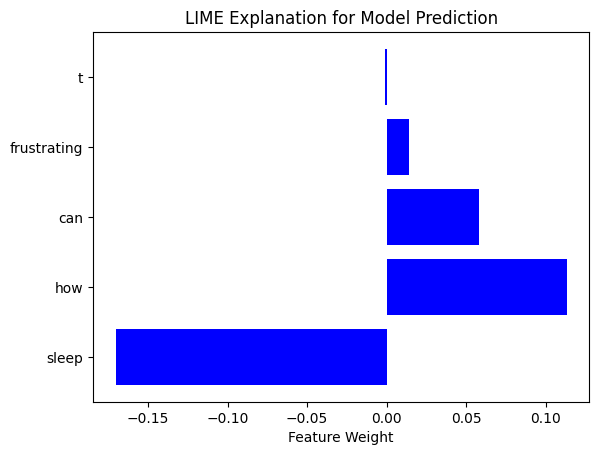

In [ ]:
import matplotlib.pyplot as plt

# Get feature names and weights from the explanation
feature_names = [f[0] for f in exp.as_list()]
feature_weights = [f[1] for f in exp.as_list()]

# Plot the feature weights
plt.barh(feature_names, feature_weights, color='blue')
plt.xlabel('Feature Weight')
plt.title('LIME Explanation for Model Prediction')
plt.show()


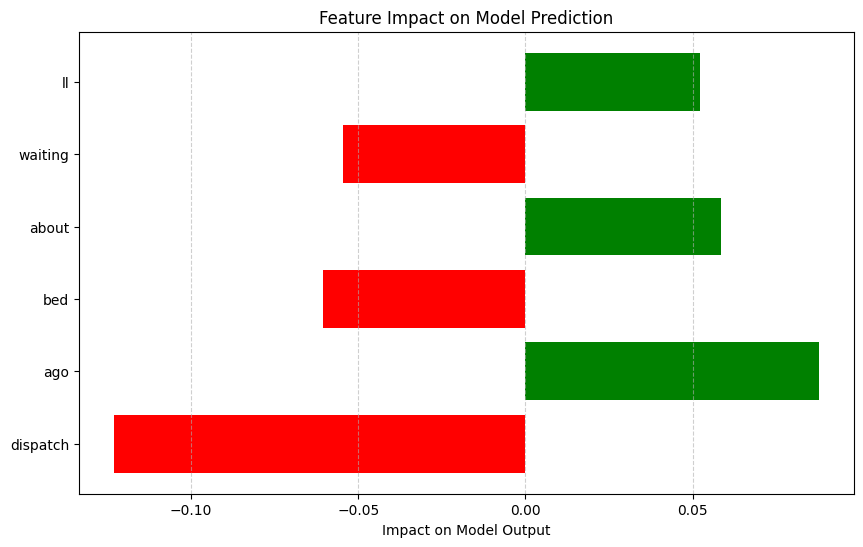

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature names and weights from the explanation
feature_names = [f[0] for f in exp.as_list()]
feature_weights = np.array([f[1] for f in exp.as_list()])

# Plot the impact of each feature on the model output
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_weights, color=['green' if w > 0 else 'red' for w in feature_weights])
plt.xlabel('Impact on Model Output')
plt.title('Feature Impact on Model Prediction')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


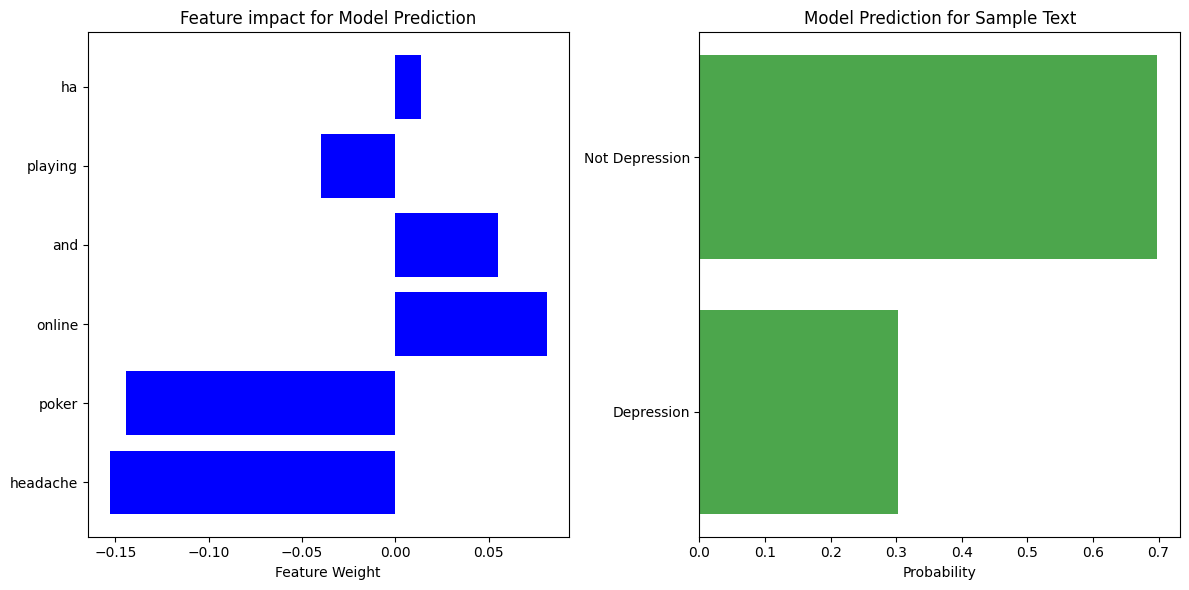

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
df = pd.read_csv("/content/depression_dataset_reddit_cleaned.csv")

# Assuming 'clean_text' is your input feature and 'is_depression' is your target variable
X = df['clean_text']
y = df['is_depression']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with TF-IDF vectorizer and Naive Bayes classifier
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

# Create a LimeTextExplainer
explainer = LimeTextExplainer(class_names=['Not Depression', 'Depression'])

# Choose a random sample for explanation
sample_text = X_test.sample().values[0]

# Explain the model's prediction
exp = explainer.explain_instance(sample_text, model.predict_proba, num_features=6)

# Get feature names and weights from the explanation
feature_names = [f[0] for f in exp.as_list()]
feature_weights = [f[1] for f in exp.as_list()]

# Plot the feature weights and model prediction
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(feature_names, feature_weights, color='blue')
plt.xlabel('Feature Weight')
plt.title('Feature impact for Model Prediction')

# Make predictions for the sample text
sample_prediction = model.predict_proba([sample_text])[0]
classes = ['Not Depression', 'Depression']
y_pos = np.arange(len(classes))

plt.subplot(1, 2, 2)
plt.barh(y_pos, sample_prediction, color='green', alpha=0.7)
plt.yticks(y_pos, classes)
plt.xlabel('Probability')
plt.title('Model Prediction for Sample Text')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


In [ ]:
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.1 MB/s eta 0:00:00


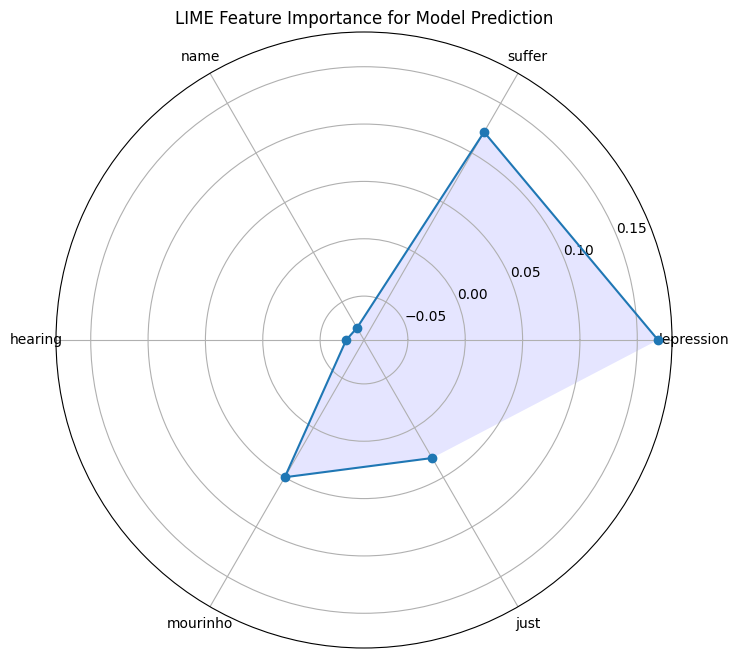

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
df = pd.read_csv("/content/depression_dataset_reddit_cleaned.csv")

# Assuming 'clean_text' is your input feature and 'is_depression' is your target variable
X = df['clean_text']
y = df['is_depression']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with TF-IDF vectorizer and Naive Bayes classifier
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

# Create a LimeTextExplainer
explainer = LimeTextExplainer(class_names=['Not Depression', 'Depression'])

# Choose a random sample for explanation
sample_text = X_test.sample().values[0]

# Explain the model's prediction
exp = explainer.explain_instance(sample_text, model.predict_proba, num_features=6)

# Get feature names and weights from the explanation
feature_names = [f[0] for f in exp.as_list()]
feature_weights = [f[1] for f in exp.as_list()]

# Define angles for octagon
angles = np.linspace(0, 2 * np.pi, len(feature_names), endpoint=False).tolist()

# Plot the octagon graph
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.plot(angles, feature_weights, marker='o')
ax.fill(angles, feature_weights, 'b', alpha=0.1)

# Set the labels for each angle
ax.set_xticks(angles)
ax.set_xticklabels(feature_names, fontsize=10)

# Set the title and grid
plt.title('LIME Feature Importance for Model Prediction', fontsize=12)
ax.grid(True)

# Show the plot
plt.show()


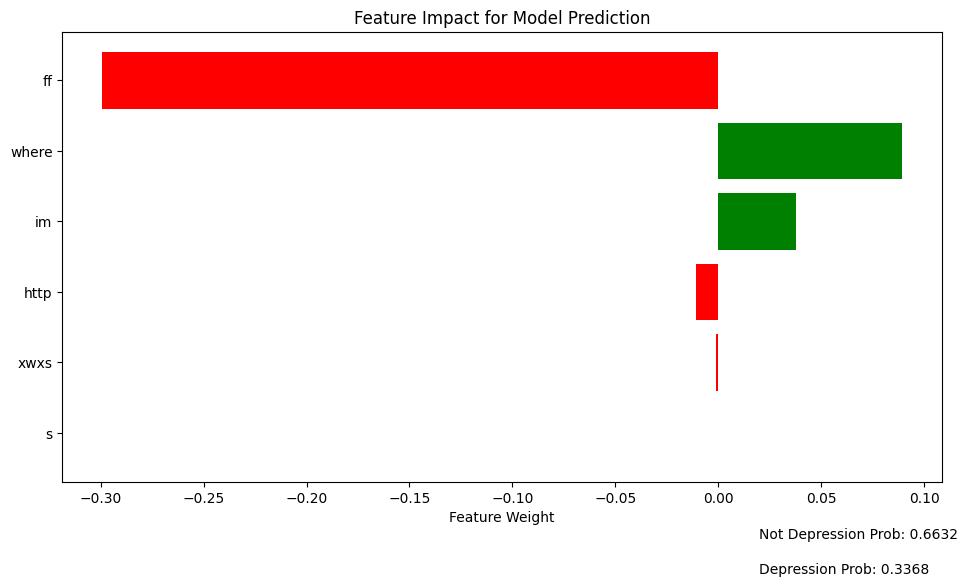

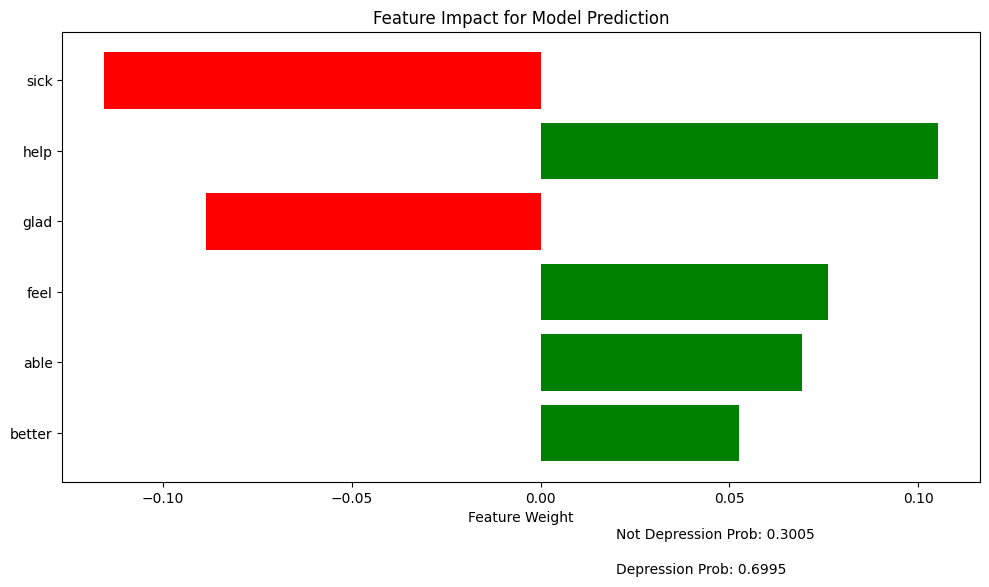

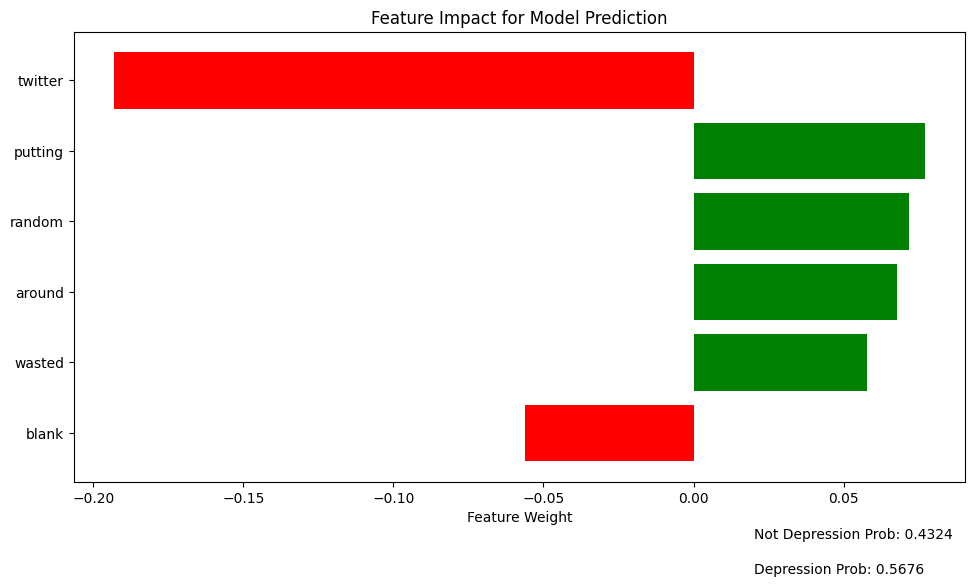

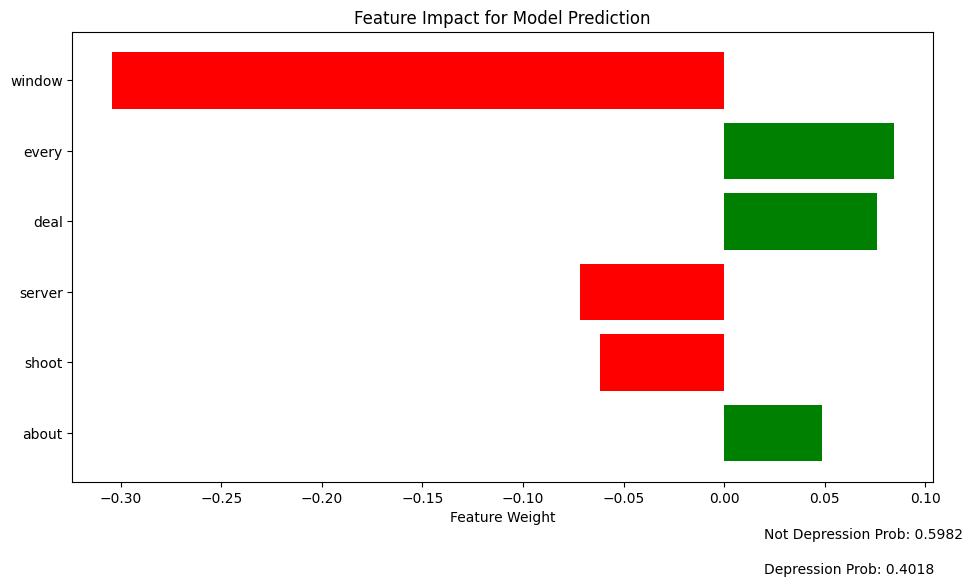

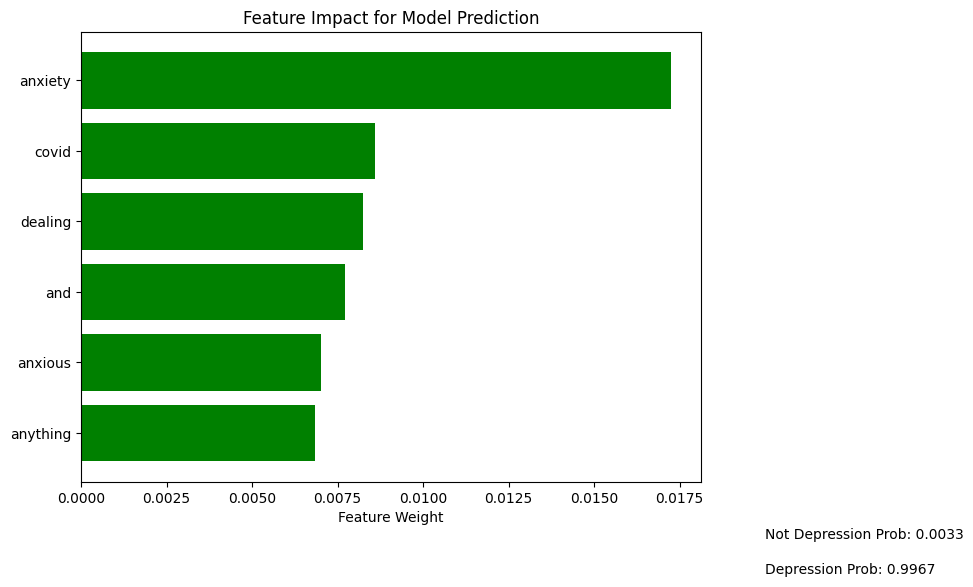

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
df = pd.read_csv("/content/depression_dataset_reddit_cleaned.csv")

# Assuming 'clean_text' is your input feature and 'is_depression' is your target variable
X = df['clean_text']
y = df['is_depression']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with TF-IDF vectorizer and Naive Bayes classifier
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

# Create a LimeTextExplainer
explainer = LimeTextExplainer(class_names=['Not Depression', 'Depression'])

# Choose random samples for explanation
num_samples = 5
sample_texts = X_test.sample(num_samples).values

# Plot for each sample
for sample_text in sample_texts:
    # Explain the model's prediction
    exp = explainer.explain_instance(sample_text, model.predict_proba, num_features=6)

    # Get feature names and weights from the explanation
    feature_names = [f[0] for f in exp.as_list()]
    feature_weights = [f[1] for f in exp.as_list()]

    # Prediction probabilities
    prediction_prob = model.predict_proba([sample_text])[0]
    pred_depression_prob = prediction_prob[1]  # Probability of "Depression"
    pred_not_depression_prob = prediction_prob[0]  # Probability of "Not Depression"

    # Plot the highlighted words
    plt.figure(figsize=(10, 6))
    colors = ['red' if w < 0 else 'green' for w in feature_weights]  # Red for negative weights, green for positive
    plt.barh(feature_names, feature_weights, color=colors)

    # Plot prediction probabilities
    plt.text(0.02, len(feature_names) + 1, f"Depression Prob: {pred_depression_prob:.4f}", fontsize=10)
    plt.text(0.02, len(feature_names) + 0.5, f"Not Depression Prob: {pred_not_depression_prob:.4f}", fontsize=10)

    plt.xlabel('Feature Weight')
    plt.title('Feature Impact for Model Prediction')
    plt.gca().invert_yaxis()  # Invert y-axis to have top features at the top
    plt.tight_layout()
    plt.show()


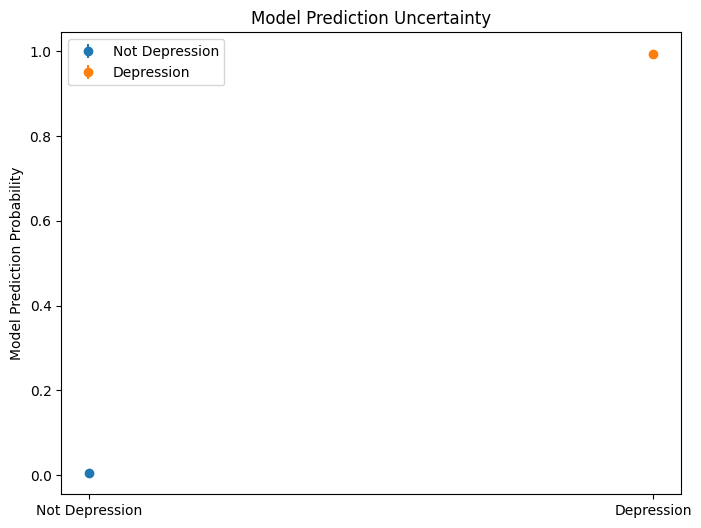

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
df = pd.read_csv("/content/depression_dataset_reddit_cleaned.csv")

# Assuming 'clean_text' is your input feature and 'is_depression' is your target variable
X = df['clean_text']
y = df['is_depression']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming you have already trained your model (model) and defined LimeTextExplainer (explainer)

# Choose a random sample for explanation
sample_text = X_test.sample().values[0]

# Explain the model's prediction
exp = explainer.explain_instance(sample_text, model.predict_proba, num_features=6)

# Function to generate perturbed samples
def generate_perturbations(text, num_samples=100):
    perturbations = []
    for _ in range(num_samples):
        # Randomly replace some words with a placeholder
        perturbed_text = ' '.join([word if np.random.rand() > 0.2 else 'UNK' for word in text.split()])
        perturbations.append(perturbed_text)
    return perturbations

# Generate perturbations for the selected sample text
perturbed_texts = generate_perturbations(sample_text, num_samples=100)

# Get predictions for perturbed samples
perturbed_predictions = [model.predict_proba([perturbed_text])[0] for perturbed_text in perturbed_texts]

# Calculate mean and standard deviation of predictions for each class
mean_predictions = np.mean(perturbed_predictions, axis=0)
std_predictions = np.std(perturbed_predictions, axis=0)

# Plot uncertainty graph
classes = ['Not Depression', 'Depression']
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    plt.errorbar(x=i, y=mean_predictions[i], yerr=std_predictions[i], fmt='o', label=classes[i])

plt.xticks(range(len(classes)), classes)
plt.ylabel('Model Prediction Probability')
plt.title('Model Prediction Uncertainty')
plt.legend()
plt.show()


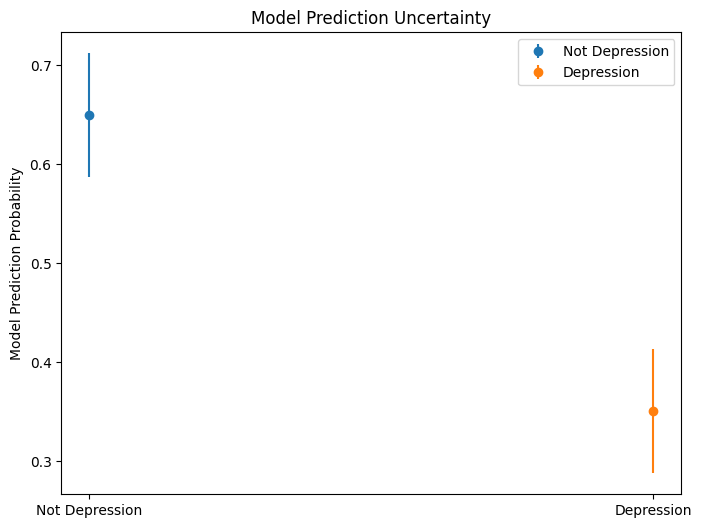

In [ ]:
import numpy as np

# Function to generate perturbed samples
def generate_perturbations(text, num_samples=100):
    perturbations = []
    for _ in range(num_samples):
        # Randomly replace some words with a placeholder
        perturbed_text = ' '.join([word if np.random.rand() > 0.2 else 'UNK' for word in text.split()])
        perturbations.append(perturbed_text)
    return perturbations

# Generate perturbations for the selected sample text
perturbed_texts = generate_perturbations(sample_text, num_samples=100)

# Get predictions for perturbed samples
perturbed_predictions = [model.predict_proba([perturbed_text])[0] for perturbed_text in perturbed_texts]

# Calculate mean and standard deviation of predictions for each class
mean_predictions = np.mean(perturbed_predictions, axis=0)
std_predictions = np.std(perturbed_predictions, axis=0)

# Plot uncertainty graph
classes = ['Not Depression', 'Depression']
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    plt.errorbar(x=i, y=mean_predictions[i], yerr=std_predictions[i], fmt='o', label=classes[i])

plt.xticks(range(len(classes)), classes)
plt.ylabel('Model Prediction Probability')
plt.title('Model Prediction Uncertainty')
plt.legend()
plt.show()


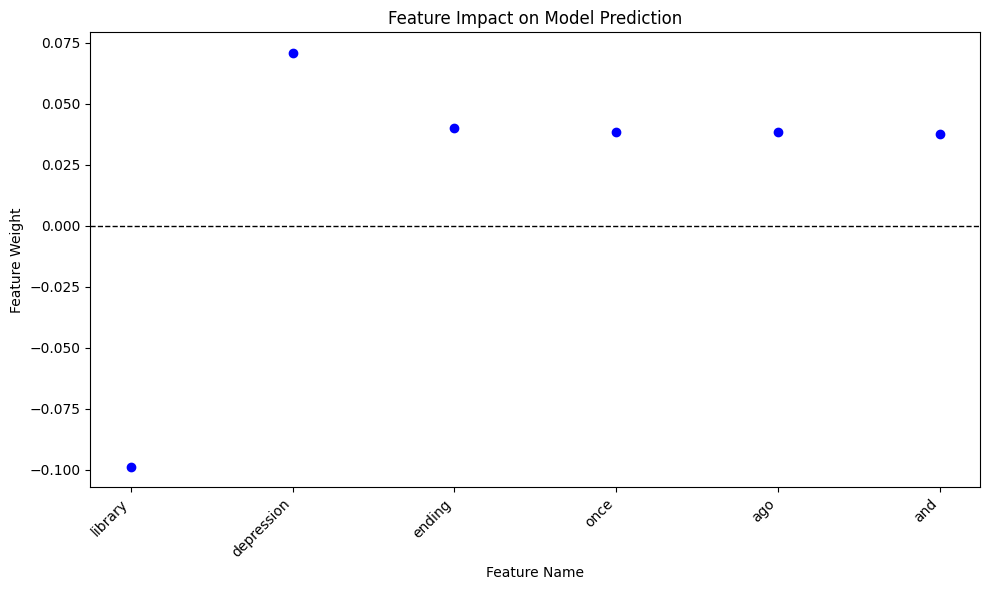

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
df = pd.read_csv("/content/depression_dataset_reddit_cleaned.csv")

# Assuming 'clean_text' is your input feature and 'is_depression' is your target variable
X = df['clean_text']
y = df['is_depression']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming you have already trained your model (model) and defined LimeTextExplainer (explainer)

# Choose a random sample for explanation
sample_text = X_test.sample().values[0]

# Explain the model's prediction
exp = explainer.explain_instance(sample_text, model.predict_proba, num_features=6)

# Get feature names and weights from the explanation
feature_names = [f[0] for f in exp.as_list()]
feature_weights = [f[1] for f in exp.as_list()]

# Create a scatter plot for feature impact
plt.figure(figsize=(10, 6))
plt.scatter(feature_names, feature_weights, color='blue', marker='o')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Feature Name')
plt.ylabel('Feature Weight')
plt.title('Feature Impact on Model Prediction')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


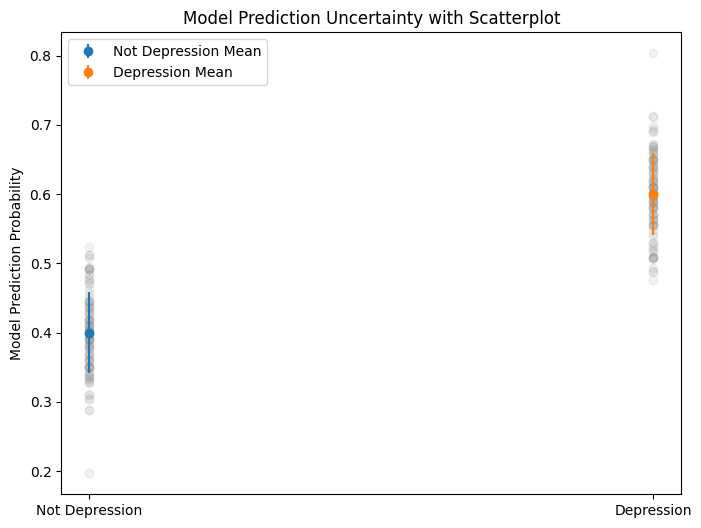

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
df = pd.read_csv("/content/depression_dataset_reddit_cleaned.csv")

# Assuming 'clean_text' is your input feature and 'is_depression' is your target variable
X = df['clean_text']
y = df['is_depression']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming you have already trained your model (model) and defined LimeTextExplainer (explainer)

# Choose a random sample for explanation
sample_text = X_test.sample().values[0]

# Explain the model's prediction
exp = explainer.explain_instance(sample_text, model.predict_proba, num_features=6)

# Function to generate perturbed samples
def generate_perturbations(text, num_samples=100):
    perturbations = []
    for _ in range(num_samples):
        # Randomly replace some words with a placeholder
        perturbed_text = ' '.join([word if np.random.rand() > 0.2 else 'UNK' for word in text.split()])
        perturbations.append(perturbed_text)
    return perturbations

# Generate perturbations for the selected sample text
perturbed_texts = generate_perturbations(sample_text, num_samples=100)

# Get predictions for perturbed samples
perturbed_predictions = [model.predict_proba([perturbed_text])[0] for perturbed_text in perturbed_texts]

# Calculate mean and standard deviation of predictions for each class
mean_predictions = np.mean(perturbed_predictions, axis=0)
std_predictions = np.std(perturbed_predictions, axis=0)

# Plot uncertainty graph
classes = ['Not Depression', 'Depression']
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    plt.errorbar(x=i, y=mean_predictions[i], yerr=std_predictions[i], fmt='o', label=f'{classes[i]} Mean')

# Scatterplot of individual perturbed predictions
for i, perturbed_pred in enumerate(perturbed_predictions):
    plt.scatter([0, 1], perturbed_pred, alpha=0.1, color='gray')

plt.xticks(range(len(classes)), classes)
plt.ylabel('Model Prediction Probability')
plt.title('Model Prediction Uncertainty with Scatterplot')
plt.legend()
plt.show()


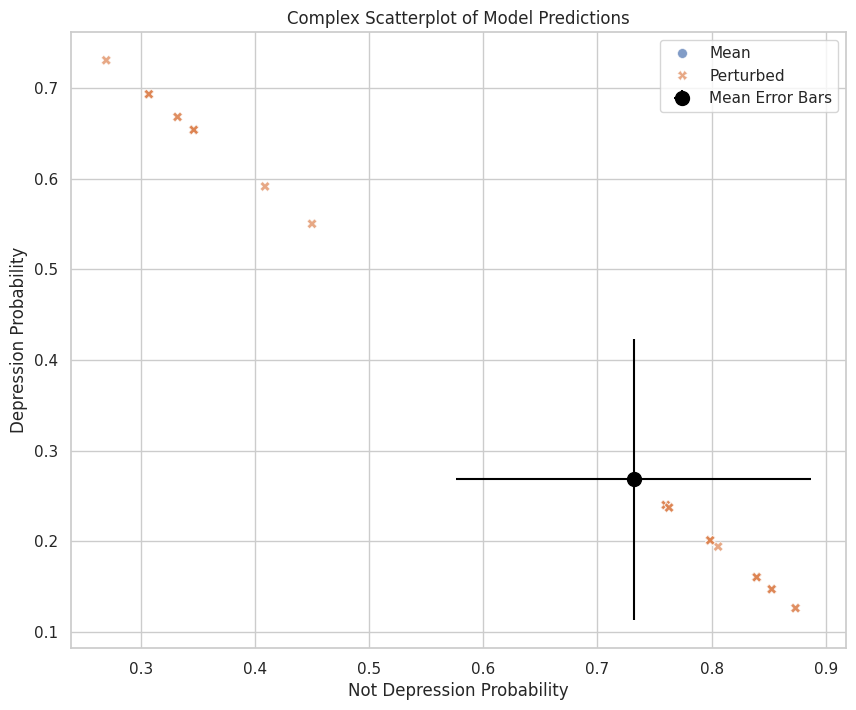

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your dataset
df = pd.read_csv("/content/depression_dataset_reddit_cleaned.csv")

# Assuming 'clean_text' is your input feature and 'is_depression' is your target variable
X = df['clean_text']
y = df['is_depression']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming you have already trained your model (model) and defined LimeTextExplainer (explainer)

# Choose a random sample for explanation
sample_text = X_test.sample().values[0]

# Explain the model's prediction
exp = explainer.explain_instance(sample_text, model.predict_proba, num_features=6)

# Function to generate perturbed samples
def generate_perturbations(text, num_samples=100):
    perturbations = []
    for _ in range(num_samples):
        # Randomly replace some words with a placeholder
        perturbed_text = ' '.join([word if np.random.rand() > 0.2 else 'UNK' for word in text.split()])
        perturbations.append(perturbed_text)
    return perturbations

# Generate perturbations for the selected sample text
perturbed_texts = generate_perturbations(sample_text, num_samples=100)

# Get predictions for perturbed samples
perturbed_predictions = [model.predict_proba([perturbed_text])[0] for perturbed_text in perturbed_texts]

# Calculate mean and standard deviation of predictions for each class
mean_predictions = np.mean(perturbed_predictions, axis=0)
std_predictions = np.std(perturbed_predictions, axis=0)

# Combine mean predictions and perturbed predictions for visualization
all_predictions = np.vstack([mean_predictions, perturbed_predictions])

# Prepare data for seaborn scatterplot
classes = ['Not Depression', 'Depression']
predictions_df = pd.DataFrame(all_predictions, columns=classes)
predictions_df['Type'] = ['Mean'] + ['Perturbed'] * len(perturbed_predictions)

# Set up seaborn style
sns.set(style="whitegrid")

# Create a complex scatterplot using seaborn
plt.figure(figsize=(10, 8))
scatterplot = sns.scatterplot(data=predictions_df, x='Not Depression', y='Depression', hue='Type', style='Type', s=50, alpha=0.7)
scatterplot.errorbar(x=mean_predictions[0], y=mean_predictions[1], xerr=std_predictions[0], yerr=std_predictions[1],
                      fmt='o', markersize=10, label='Mean Error Bars', color='black')

plt.title('Complex Scatterplot of Model Predictions')
plt.xlabel('Not Depression Probability')
plt.ylabel('Depression Probability')
plt.legend()
plt.show()


In [ ]:
!pip install -q shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 8.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import shap
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("/content/depression_dataset_reddit_cleaned.csv")

# Assuming 'clean_text' is your input feature and 'is_depression' is your target variable
X = df['clean_text']
y = df['is_depression']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your model (Replace this with your actual model training code)
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

# Create a LimeTextExplainer for explanation
explainer = shap.Explainer(model.named_steps['multinomialnb'], X_train, feature_names=model.named_steps['tfidfvectorizer'].get_feature_names_out())

# Choose a random sample for explanation
sample_text = X_test.sample().values[0]

# Explain the model's prediction using SHAP values with KernelExplainer
shap_values = explainer.shap_values(model.named_steps['tfidfvectorizer'].transform([sample_text]))

# Create a summary plot
shap.summary_plot(shap_values, X_test.iloc[:100], feature_names=model.named_steps['tfidfvectorizer'].get_feature_names_out(), show=False)
plt.show()


TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: MultinomialNB()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import shap
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("/content/depression_dataset_reddit_cleaned.csv")

# Assuming 'clean_text' is your input feature and 'is_depression' is your target variable
X = df['clean_text']
y = df['is_depression']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your model (Replace this with your actual model training code)
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

# Create a LimeTextExplainer for explanation
explainer = shap.Explainer(model.named_steps['multinomialnb'], X_train, feature_names=model.named_steps['tfidfvectorizer'].get_feature_names_out())

# Choose a random sample for explanation
sample_text = X_test.sample().values[0]

# Explain the model's prediction using SHAP values
shap_values = explainer.shap_values([sample_text])

# Create a summary plot
shap.summary_plot(shap_values, X_test.iloc[:100], feature_names=model.named_steps['tfidfvectorizer'].get_feature_names_out(), show=False)
plt.show()


TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: MultinomialNB()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import shap
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("/content/depression_dataset_reddit_cleaned.csv")

# Assuming 'clean_text' is your input feature and 'is_depression' is your target variable
X = df['clean_text']
y = df['is_depression']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your model (Replace this with your actual model training code)
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

# Choose a random sample for explanation
sample_text = X_test.sample().values[0]

# Create a function that takes raw text as input and returns model predictions
def predict_function(text):
    return model.predict_proba([text])[0]

# Create a KernelExplainer
kernel_explainer = shap.KernelExplainer(predict_function, X_train)

# Explain the model's prediction using SHAP values
shap_values = kernel_explainer.shap_values(model.named_steps['tfidfvectorizer'].transform([sample_text]))

# Create a summary plot
shap.summary_plot(shap_values, X_test.iloc[:100], feature_names=model.named_steps['tfidfvectorizer'].get_feature_names_out(), show=False)
plt.show()


Provided model function fails when applied to the provided data set.


AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import shap
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("/content/depression_dataset_reddit_cleaned.csv")

# Assuming 'clean_text' is your input feature and 'is_depression' is your target variable
X = df['clean_text']
y = df['is_depression']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your model (Replace this with your actual model training code)
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

# Choose a random sample for explanation
sample_text = X_test.sample().values[0]

# Create a function that takes raw text as input and returns model predictions
def predict_function(text):
    return model.predict_proba([text])[0][1]  # Return the probability of 'Depression' class

# Transform the entire dataset for KernelExplainer
X_train_transformed = model.named_steps['tfidfvectorizer'].transform(X_train)

# Create a KernelExplainer
kernel_explainer = shap.KernelExplainer(predict_function, X_train_transformed)

# Explain the model's prediction using SHAP values
shap_values = kernel_explainer.shap_values(model.named_steps['tfidfvectorizer'].transform([sample_text])[0])

# Create a summary plot
shap.summary_plot(shap_values, model.named_steps['tfidfvectorizer'].transform(X_test), feature_names=model.named_steps['tfidfvectorizer'].get_feature_names_out(), show=False)
plt.show()


Provided model function fails when applied to the provided data set.


AttributeError: 'csr_matrix' object has no attribute 'lower'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import shap
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("/content/depression_dataset_reddit_cleaned.csv")

# Assuming 'clean_text' is your input feature and 'is_depression' is your target variable
X = df['clean_text']
y = df['is_depression']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your model (Replace this with your actual model training code)
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

# Choose a random sample for explanation
sample_text = X_test.sample().values[0]

# Create a function that takes raw text as input and returns model predictions
def predict_function(text):
    return model.predict_proba([text])[0][1]  # Return the probability of 'Depression' class

# Transform the entire dataset for KernelExplainer
X_train_transformed = model.named_steps['tfidfvectorizer'].transform(X_train)

# Create a KernelExplainer
kernel_explainer = shap.KernelExplainer(predict_function, X_train_transformed)

# Explain the model's prediction using SHAP values
shap_values = kernel_explainer.shap_values(model.named_steps['tfidfvectorizer'].transform([sample_text])[0])

# Plot the SHAP values as a line plot
feature_names = model.named_steps['tfidfvectorizer'].get_feature_names_out()
plt.figure(figsize=(12, 6))
plt.plot(shap_values.flatten(), marker='o', linestyle='-', color='blue')
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('SHAP Value')
plt.title('SHAP Values for Features')
plt.show()


Provided model function fails when applied to the provided data set.


AttributeError: 'csr_matrix' object has no attribute 'lower'

In [ ]:
pip install wordcloud


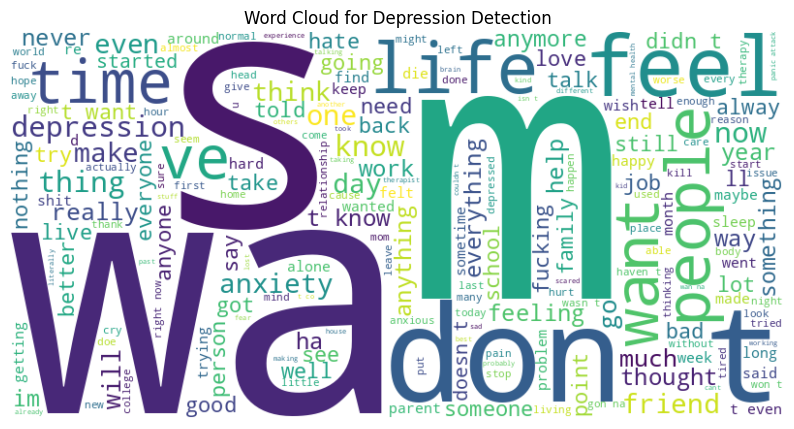

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'depression_text' is a new column containing text data related to depression
df['depression_text'] = df[df['is_depression'] == 1]['clean_text']

# Combine all depression-related text into a single string
depression_text = ' '.join(df['depression_text'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(depression_text)

# Plot the WordCloud image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Depression Detection')
plt.show()


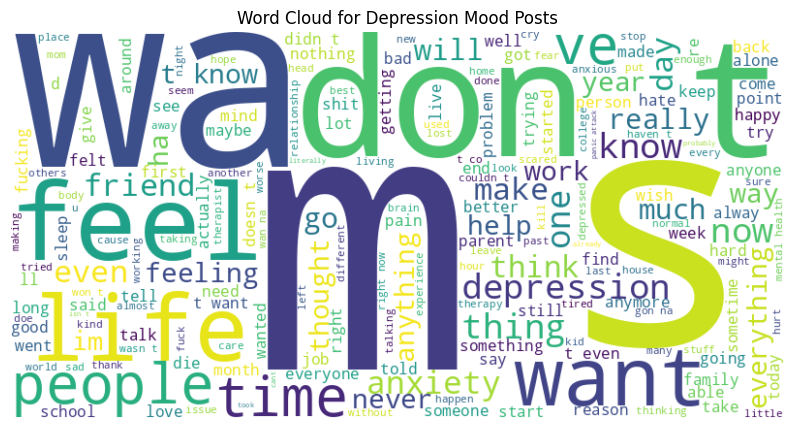

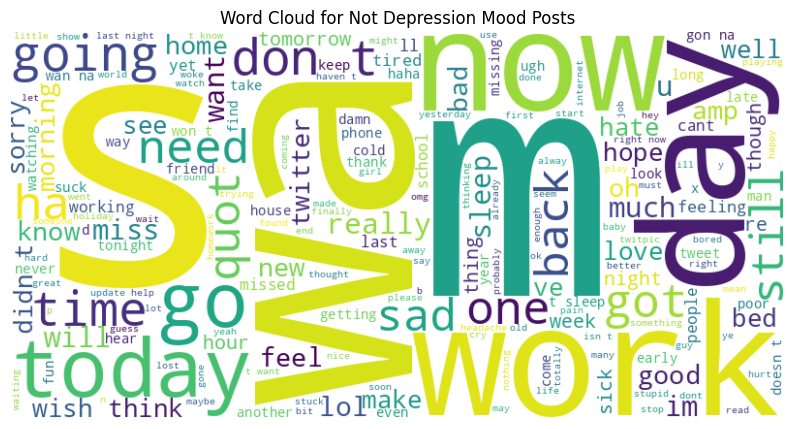

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'depression_text' is a new column containing text data related to depression
df['depression_text'] = df[df['is_depression'] == 1]['clean_text']
depression_text = ' '.join(df['depression_text'].dropna())

# Assuming 'non_depression_text' is a new column containing text data not related to depression
df['non_depression_text'] = df[df['is_depression'] == 0]['clean_text']
non_depression_text = ' '.join(df['non_depression_text'].dropna())

# Generate word cloud for depression-related text
wordcloud_depression = WordCloud(width=800, height=400, background_color='white').generate(depression_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_depression, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Depression Mood Posts')
plt.show()

# Generate word cloud for non-depression-related text
wordcloud_non_depression = WordCloud(width=800, height=400, background_color='white').generate(non_depression_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_non_depression, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Not Depression Mood Posts')
plt.show()


ValueError: x and y must have same first dimension, but have shapes (6,) and (7,)

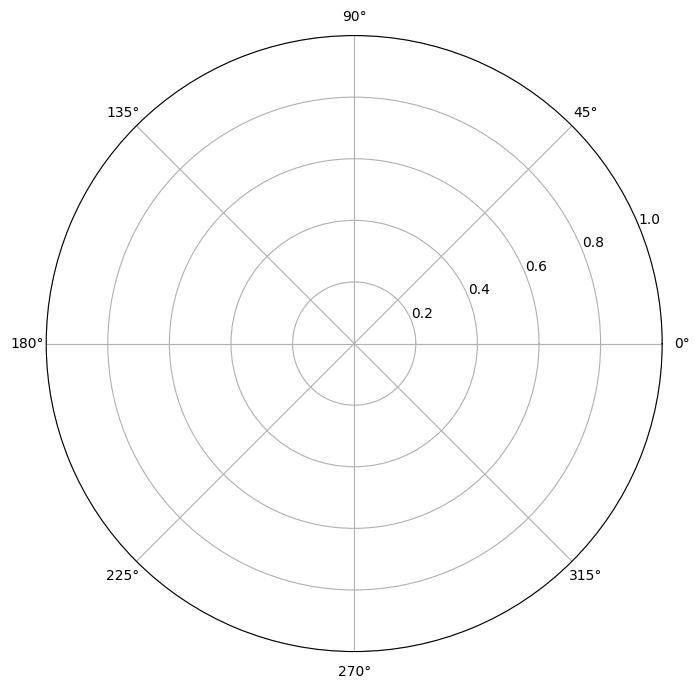

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Replace these values with your actual feature names and their corresponding weights
feature_names = [f[0] for f in exp.as_list()]
feature_weights = [f[1] for f in exp.as_list()]

# Number of features
num_features = len(feature_names)

# Create a radar chart
angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
values = feature_weights
values += values[:1]  # Repeat the first value to close the circular graph

# Plot the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='green', alpha=0.25)

# Add labels for each feature
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(feature_names)

# Show the plot
plt.title('Radar Diagram for Feature Impact on Model Prediction')
plt.show()
